# Melanoma Detection

### Importing all the important libraries


In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing Skin Cancer Data

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.


In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
## val_ds = ##to do
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data

#### To do, create a code to visualize one instance of all the nine classes present in the dataset

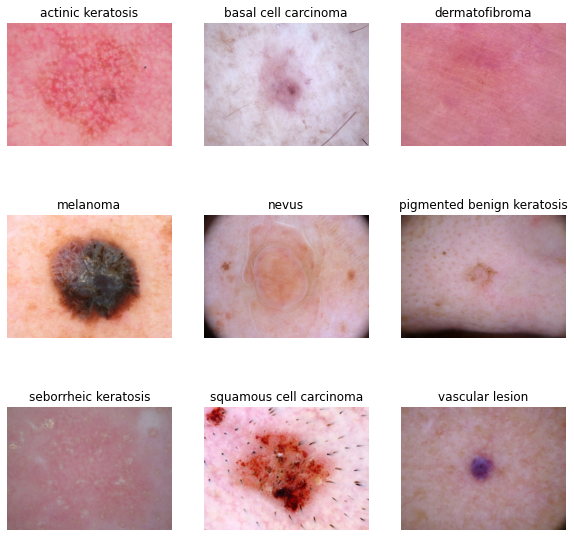

In [15]:
### using training data to visualize
plt.figure(figsize=(10,10))
for i in range(len(class_names)): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [17]:
## defining the layer of CNN model
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), ## Normalisation layer to scale the RGB value between 0 and 1
  ## 1st convolutional layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  ## 2nd convolutional layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  ## 3rd convolutional layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  ## Convert layer into 1-D
  layers.Flatten(),
  ## Fully connected layer
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

### Compile the model

In [18]:
## compiling model using adam optimiser and SparseCategoricalCrossentropy loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# Viewing the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [20]:
## training model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 715s 4s/step - loss: 2.0338 - accuracy: 0.2310 - val_loss: 1.7739 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 80s 1s/step - loss: 1.7333 - accuracy: 0.3683 - val_loss: 1.5639 - val_accuracy: 0.4497
Epoch 3/20
56/56 [==============================] - 75s 1s/step - loss: 1.5043 - accuracy: 0.4754 - val_loss: 1.6685 - val_accuracy: 0.4519
Epoch 4/20
56/56 [==============================] - 72s 1s/step - loss: 1.3927 - accuracy: 0.5112 - val_loss: 1.3579 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 77s 1s/step - loss: 1.2708 - accuracy: 0.5625 - val_loss: 1.4157 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 78s 1s/step - loss: 1.1741 - accuracy: 0.5848 - val_loss: 1.3951 - val_accuracy: 0.5548
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.1049 - accuracy: 0.6211 - val_loss: 1.3600 - val_accuracy: 0.5570
Epoch 8/20
56/56 [=

### Visualizing training results

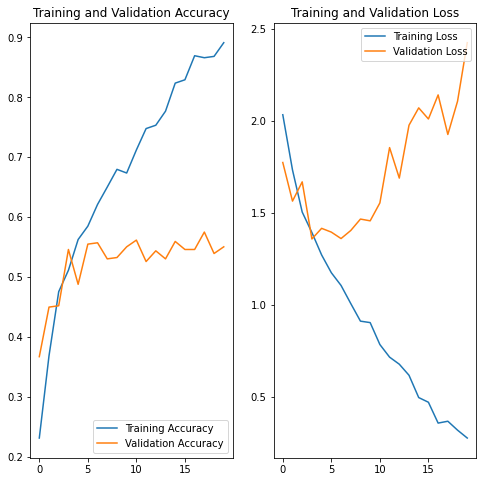

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**

From the graph, we can see there is a significant difference between training and validation accuracy. The training accuracy is 89.12% while the validation accuracy is 55.03% which is clearly the sign of overfitting. If we further analyze the loss graph, we can we can see that during initial epoch, both the training and validation loss were decreasing but after that the training loss started decreasing continuously while the validation loss observed a sudden spike. In order to tackle this situation, we will use data augmentation.

### Data Augumentation

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
## Defining the data augementation pipeline

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

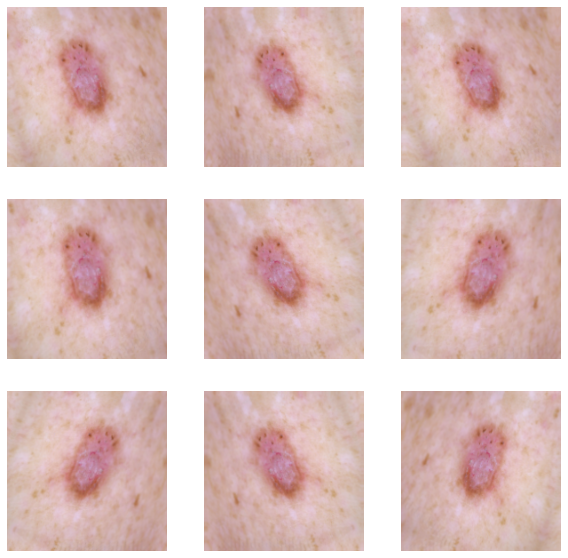

In [24]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Create the Model

In [25]:
# Creating the model using dropout layer (20%) as we found the evidence overfitting in the previous model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

### Compiling the model

In [26]:
## compiling model using adam optimiser and SparseCategoricalCrossentropy loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# viewing model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [28]:
## training model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 93s 2s/step - loss: 2.0451 - accuracy: 0.2355 - val_loss: 1.9080 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 83s 1s/step - loss: 1.8004 - accuracy: 0.3415 - val_loss: 1.6622 - val_accuracy: 0.3803
Epoch 3/20
56/56 [==============================] - 92s 2s/step - loss: 1.5846 - accuracy: 0.4436 - val_loss: 1.5012 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 88s 2s/step - loss: 1.4151 - accuracy: 0.5028 - val_loss: 1.4377 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 86s 2s/step - loss: 1.3638 - accuracy: 0.5229 - val_loss: 1.4631 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 83s 1s/step - loss: 1.3239 - accuracy: 0.5312 - val_loss: 1.4603 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 83s 1s/step - loss: 1.2692 - accuracy: 0.5413 - val_loss: 1.3317 - val_accuracy: 0.5391
Epoch 8/20
56/56 [=============

### Visualizing the results

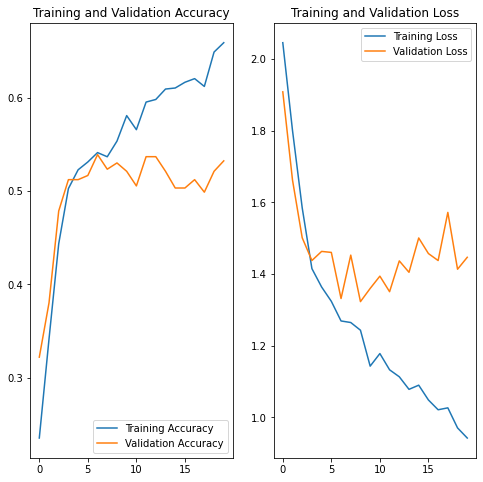

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**

After applying data augmentation and dropout of 20%, there is less sign overfitting than before.Training accuracy is 65.90%, Validation accuracy 53.24%. The above result shows data augmentation solve our problem of overfitting to much extent.

## Class Imbalance

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [31]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,actinic keratosis
1,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,actinic keratosis
2,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,actinic keratosis
3,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,actinic keratosis
4,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,basal cell carcinoma
2235,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,basal cell carcinoma
2236,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,basal cell carcinoma
2237,/content/gdrive/MyDrive/ML Dataset/Skin cancer...,basal cell carcinoma


Class=0, n=114 (5.092%)
Class=8, n=139 (6.208%)
Class=7, n=181 (8.084%)
Class=6, n=77 (3.439%)
Class=5, n=462 (20.634%)
Class=4, n=357 (15.945%)
Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)


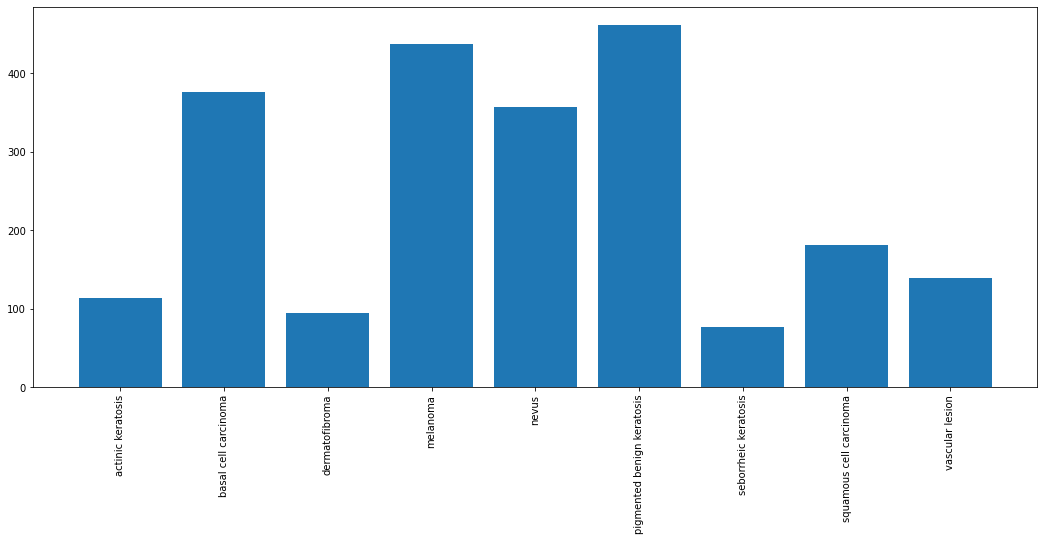

In [32]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
plt.figure(figsize=(18,7))
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
# plt.bar(counter.keys(), counter.values())
plt.bar(counter.keys(), counter.values())
plt.xticks(range(len(counter)), (class_names), rotation='vertical')
plt.show()

Observation:- From the graph, we can see that **seborrheic keratosis** has least number of sample (3.43%). On the other hand, **basal cell carcinoma, melanoma,nevus, pigmented benign keratosis** classes are dominating in data sets
We can clearly observe class imbalance in the dataset which can effect our model. We can eleminate this class imbalances issue by Augmentor.

### Using Augmentor

In [34]:
# installing Augmentor
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
path_to_training_dataset="/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6014C83F70>: 100%|██████████| 500/500 [00:31<00:00, 15.67 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F601439EF70>: 100%|██████████| 500/500 [00:35<00:00, 14.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6014CB6640>: 100%|██████████| 500/500 [00:26<00:00, 19.03 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F6014342D90>: 100%|██████████| 500/500 [01:58<00:00,  4.21 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F6014CC35B0>: 100%|██████████| 500/500 [01:55<00:00,  4.32 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6015508C40>: 100%|██████████| 500/500 [00:27<00:00, 18.50 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F60143E2F10>: 100%|██████████| 500/500 [00:59<00:00,  8.46 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F602C2CE2B0>: 100%|██████████| 500/500 [00:26<00:00, 18.73 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F60143E2F10>: 100%|██████████| 500/500 [00:25<00:00, 19.38 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
## Count of image
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [37]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032206.jpg_054fe903-af30-4740-af62-e601574445d2.jpg',
 '/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028370.jpg_ef9edaa9-d390-4d15-be97-6b87215691be.jpg',
 '/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028820.jpg_bf89c626-cfa7-4ace-ad49-b78f665f95db.jpg',
 '/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_43e5fe42-3e82-4779-b301-d02c08f1f7cc.jpg',
 '/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/ac

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new
     

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
     

In [40]:
## Creating dataframe of the above dictionary
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = (df2)

In [41]:
## Counting each classes after solving the problem of class imbalance
new_df['Label'].value_counts()

actinic keratosis             500
vascular lesion               500
squamous cell carcinoma       500
seborrheic keratosis          500
pigmented benign keratosis    500
nevus                         500
melanoma                      500
dermatofibroma                500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [45]:
data_dir_train="/content/gdrive/MyDrive/ML Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create your model

In [48]:
# We're using BatchNormalisation and dropout to reduce overfitting
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
 

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),

  layers.Dense(9)
])

### Compile your model

In [49]:
# We're using Adam as optimiser and SparseCategoricalCrossentropy as loss function for the model training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
## Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

### Train the model

In [50]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


169/169 [==============================] - 377s 2s/step - loss: 1.6548 - accuracy: 0.3926 - val_loss: 2.3226 - val_accuracy: 0.2799
Epoch 2/30
169/169 [==============================] - 378s 2s/step - loss: 1.4516 - accuracy: 0.4625 - val_loss: 1.9383 - val_accuracy: 0.3259
Epoch 3/30
169/169 [==============================] - 385s 2s/step - loss: 1.3551 - accuracy: 0.4874 - val_loss: 2.4459 - val_accuracy: 0.2190
Epoch 4/30
169/169 [==============================] - 377s 2s/step - loss: 1.3218 - accuracy: 0.4981 - val_loss: 1.6073 - val_accuracy: 0.4157
Epoch 5/30
169/169 [==============================] - 376s 2s/step - loss: 1.2657 - accuracy: 0.5263 - val_loss: 1.6807 - val_accuracy: 0.3808
Epoch 6/30
169/169 [==============================] - 356s 2s/step - loss: 1.2378 - accuracy: 0.5339 - val_loss: 1.8328 - val_accuracy: 0.3727
Epoch 7/30
169/169 [==============================] - 370s 2s/step - loss: 1.1769 - accuracy: 0.5608 - val_loss: 1.4882 - val_accuracy: 0.4454
Epoch 8/30

### Visualize the model results

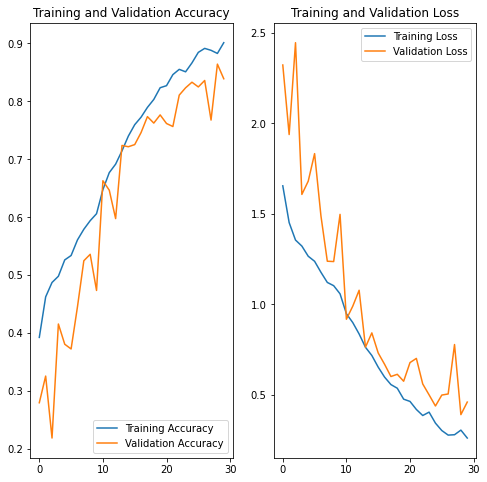

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Result Analysis

From the above graph, we can find that the accuracy on both the training and validation data has increased after solving class imbalance problem. The training accuracy is 90.11% and validation accuracy is 83.89% which shows us we finally tackle the problem of overfitting. Similarly both the training and validation loss droped to much extent.